In [81]:
from mytorch import MLP
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def f(x):
    return x**3

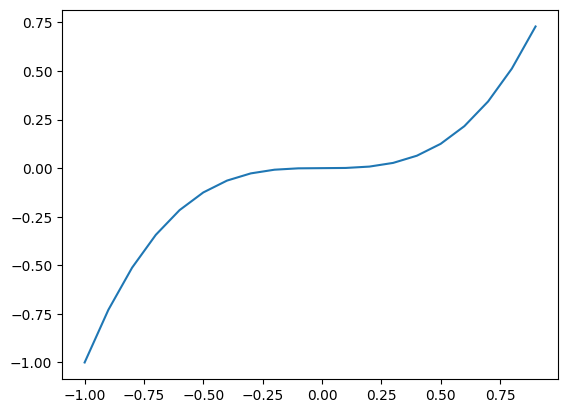

In [104]:
xs = np.arange(-1, 1, 0.1)
ys = f(xs)
plt.plot(xs, ys)

In [105]:
xs = [[x] for x in list(xs)]
ys = list(ys)
print(xs, ys)

[[-1.0], [-0.9], [-0.8], [-0.7000000000000001], [-0.6000000000000001], [-0.5000000000000001], [-0.40000000000000013], [-0.30000000000000016], [-0.20000000000000018], [-0.1000000000000002], [-2.220446049250313e-16], [0.09999999999999964], [0.19999999999999973], [0.2999999999999998], [0.3999999999999997], [0.49999999999999956], [0.5999999999999996], [0.6999999999999997], [0.7999999999999996], [0.8999999999999995]] [-1.0, -0.7290000000000001, -0.5120000000000001, -0.3430000000000001, -0.2160000000000001, -0.12500000000000008, -0.06400000000000007, -0.02700000000000004, -0.008000000000000021, -0.001000000000000006, -1.0947644252537633e-47, 0.0009999999999999894, 0.007999999999999967, 0.02699999999999995, 0.06399999999999985, 0.12499999999999967, 0.2159999999999996, 0.3429999999999996, 0.5119999999999992, 0.7289999999999988]


In [110]:
n = MLP(1, [4,4,1])

def calculate_loss(ypred, ys):
    return sum([(pred - actual) ** 2 for pred, actual in zip(ypred, ys)])

steps = 1001
learning_rate = 0.01

for k in range(steps):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = calculate_loss(ypred, ys)

    # since grads do +=, we need to reset each time
    # torch.zero_grad()
    for p in n.parameters():
        p.grad = 0.0

    # backward pass
    loss.backward()

    # a positive gradient means increasing value will increase the loss
    # neg is inverse
    for p in n.parameters():
        p.data += -learning_rate * p.grad
    if k % 100 == 0:
        print(k, loss.data)


ypred = [n(x) for x in xs]
print(ypred)
print("TOTAL LOSS", calculate_loss(ypred, ys))


0 20.050165672511323
100 0.5420439954116736
200 0.4401602112163064
300 0.32440267068120937
400 0.19751492689582423
500 0.10192330156173951
600 0.05543214996522098
700 0.03959882810221082
800 0.03274284919779011
900 0.028347180334699202
1000 0.025478256701412343
[Value(data=-0.8737875592073849), Value(data=-0.7578235691843023), Value(data=-0.5616743651905977), Value(data=-0.3500007437413059), Value(data=-0.19638841094067044), Value(data=-0.1066857592367548), Value(data=-0.05810478913271443), Value(data=-0.03199251947608431), Value(data=-0.017744703699149083), Value(data=-0.009713405638824231), Value(data=-0.004558738718529691), Value(data=0.00044325419003105835), Value(data=0.008693764420442184), Value(data=0.02556563001725475), Value(data=0.059648965135204964), Value(data=0.12287871394614908), Value(data=0.22653419190058843), Value(data=0.3697222758470933), Value(data=0.5278823038319616), Value(data=0.6646807565228872)]
TOTAL LOSS Value(data=0.025488842643199235)


[-0.8737875592073849, -0.7578235691843023, -0.5616743651905977, -0.3500007437413059, -0.19638841094067044, -0.1066857592367548, -0.05810478913271443, -0.03199251947608431, -0.017744703699149083, -0.009713405638824231, -0.004558738718529691, 0.00044325419003105835, 0.008693764420442184, 0.02556563001725475, 0.059648965135204964, 0.12287871394614908, 0.22653419190058843, 0.3697222758470933, 0.5278823038319616, 0.6646807565228872]
TOTAL LOSS 0.025488842643199235


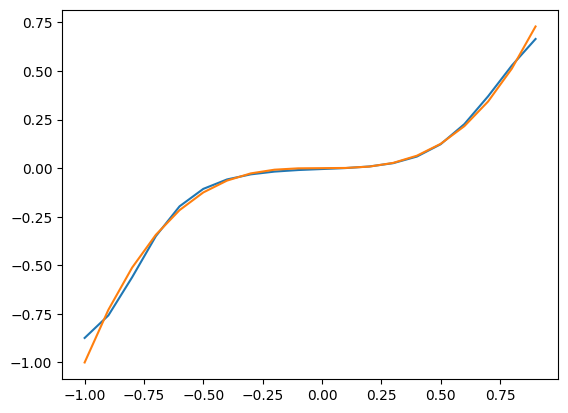

In [112]:
ypred = [n(x).data for x in xs]
print(ypred)
print("TOTAL LOSS", calculate_loss(ypred, ys))
plt.plot(xs, ypred, label="pred")
plt.plot(xs, ys, label="true")
plt.show()